## Przeanalizowanie zadania

Mam zamiar wytrenowac model ktory bedzie poprawnie klasyfikował ręcznie pisane cyfry od 0 do 9 korzystajac ze zbioru MNIST
Wykorzystam do tego siec konwolucyjna która polega na przesuwaniu filtra (jadra konwolucyjnego ) po obrazie i obliczaniu iloczynu skalarnego miedzy filtrem a fragmentami obrazu 

In [1]:
import numpy as np
np.random.seed(0)

#Tensorflow
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist

###  Wczytywanie danych

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print((X_train.shape), (X_test.shape))

(60000, 28, 28) (10000, 28, 28)


Zbiór danych MINST zawiera 60 000 próbek obrazów (28x28 pikseli) z cyframi recznie pisanymi od 0 do 9 oraz zestaw testowy o wielkosci 10 000 obrazów.

Został on podzielony autoatycznie na zestaw treningowy i testowy

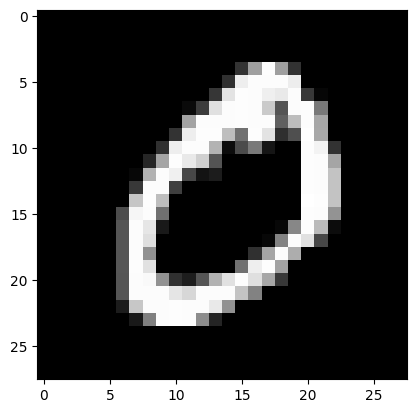

In [7]:
import matplotlib.pyplot as plt

plt.imshow(X_train[1], cmap = 'gray')
plt.show()


W zbiorze danych MNIST kazdy obraz to macierz o wymiarach 28x28 w której wartosci odpowiadaja odcieniom szarości pikseli obrazu. 

#### Normalizacja danych 
Skaluje wartości z przedziału [0,255] do [0,1]

Zmiennnoprzecinkowe liczby pozwalaja na reprezentowanie wartości z wiekszą dokładnoscia, szczególnie w przypadku małych liczb

In [9]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

num_classes = 10
img_rows, img_cols = 28,28

Konwersja etykiet na wektory one-hot dla zmiennej docelowej



In [11]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

### Budowanie Modelu  sieci konwolucyjnych 

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout, Input

model = Sequential([
    Input(shape=(img_rows, img_cols, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25), 
        
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    #spłaszczenie danych i dodanie warstwy w pełni połaczonych
    # spłaszczanie danych, aby połączyć warstwy konwolucyjne z fully connected layers
    Flatten(), 
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
    ])


- Sequential- Tworzy model jako sekwencje warstw
- Conv2d jest to warstwa konwolucyjna która ma 32 filtry o rozmiarze 3x3 i funkcje aktywacji ReLU. Parametr input_shape definiuje kształt wejscia (wysokosc, szerokosc, kanały )
- Max Pooling2d(pool_size=(2,2)) Zmniejsza rozmiar macierzy, wybierajac maksymalne wartosci z okienek 2x2 co redukuje wymiar i szum 
- Dropout(0,25) Losowo zeruej 25% jednostek co zapobiega przeuczeniu modelu 
- Flatten() Spłaszcza dane, przekształcajac macierz z wieloma wymiarami w wektor, który moze byc przetworzony przez warstwy Danse
- Dense(1024, activation='relu') warstwa wpełni połaczona z 1024 jednostkami uzywa funkcji relu 

### Kompilacja Modelu

Okresle teraz jak model bedzie trenowany.
Obejmuje to wybór optymalizatora, funkcji straty i metryk

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

- Optymalizator (Adam)- okresla, jak model bedzie aktualizował swoje wagi w trakcie uczeniu. Adam łaczy zalety optymalizatorów RMSprop i SGD
- Funkcja Straty (categorical_crossentropy)- Mierzy róznice miedzy przewidywaniami modelu a rzeczywitymi etykietami 
- metryki ( accuracy) uzywane do monitorowania skutecznosci  modelu , dokładnosc

### Trenowanie Modelu 

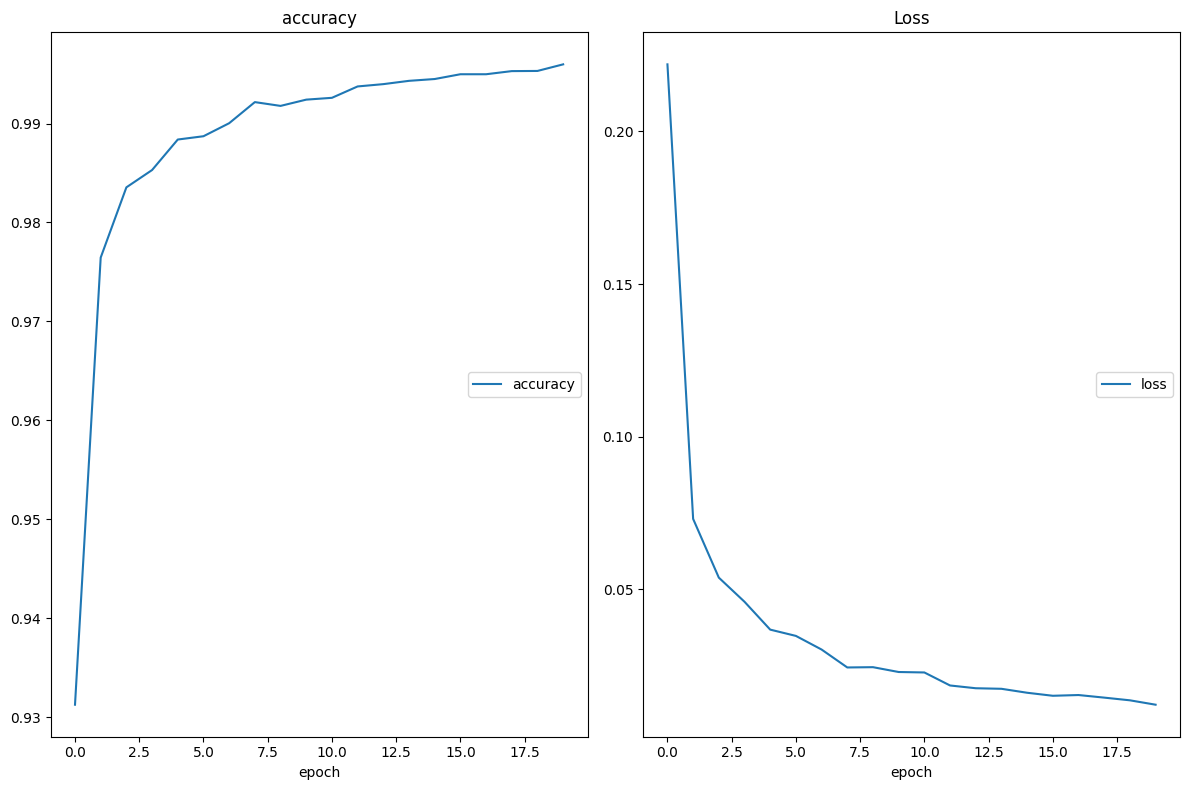

accuracy
	accuracy         	 (min:    0.931, max:    0.996, cur:    0.996)
Loss
	loss             	 (min:    0.012, max:    0.222, cur:    0.012)
469/469 [==============================] - 1s 3ms/step - loss: 0.0122 - accuracy: 0.9960


In [19]:
#Biblioteka do wizualizacji trenowanego modelu 
from livelossplot import PlotLossesKeras 

model.fit(X_train, y_train,callbacks=[PlotLossesKeras()],batch_size=128, epochs=20, verbose=1)

Funkcja fit wykonuje zadanie dopasowania modelu (trenowania)
- X_train,y_train dane treningowe i odpowiadajace im etykiety
- batch_size Dane treningowe sa podzielone na partie po 128 próbek które sa przetworzane na raz
- epochs liczba pełnych przejść przez cały zriór danych
- verbose wyswietla wizualizacje postepu trenowania modelu

### Ocena Modelu
Sprawdze teraz jak dobrze model radzi sobie z danymi testowymi

In [9]:
score = model.evaluate(X_test,y_test)
print('Test loss: ', score[0])
print('Test accuracy: ',score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9924 - loss: 0.0315
Test loss:  0.02519606053829193
Test accuracy:  0.9939000010490417


- Test loss ( score[0]) strata obliczona na danych testowych czyli jak dobrze model przewiduje 
- Test accuracy (score[1]) Dokładnosc modelu na danych testowych czyli procent poprawnych klasyfikacji

### Zapisywanie modelu 

In [10]:
model.save('../models/MNIST_model.keras')
# Zapisałem model w folderze models w formacie keras który jest zalecany

## Wnioski

Udało mi sie zbudowac konwolucujna siec neuronową, któa skutecznie klasyfikuje cyfry pisane recznie. Skutecznosc mojego projektu jest na poziomie 99,4% dokładnosci. 

Moim zdaniem normalizacja danych wejsciowych i konwersja etykiet do formatu one-hot były kluczowe dla poprawnego funkcjonowania modelu i stabilnosci treningu.

Projekt ten pokazuje ze konwolucyjne sieci neuronowe sa bardzo efektywne w klasyfikacji obrazów